- EDA v1 : https://www.kaggle.com/code/motono0223/eda-jane-street-real-time-market-data-forecasting
- EDA v2 : this notebook (visualization null_count for each date_id)

In [1]:
import numpy as np
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt

In [2]:
train = pl.scan_parquet("/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet")

In [3]:
# Count null(NaN) for eatch columns (group by date_id)
null_count_per_date_id = train.group_by("date_id").agg(pl.all().null_count()).collect()
null_count_per_date_id

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8,partition_id
i16,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,696,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261,…,812,3712,29,812,0,0,261,0,0,0,45,2,6,434,434,0,0,0,0,0,0,261,261,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,936,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,390,…,702,2652,0,702,0,0,390,0,0,0,0,0,0,2,2,0,0,0,0,0,0,390,390,551,551,87,87,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,696,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261,…,812,3712,29,812,0,0,261,0,0,0,249,153,171,362,362,0,0,0,0,0,0,261,261,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,912,0,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,…,684,2584,0,684,0,0,380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,380,56,56,8,8,0,0,0,0,0,0,0,0,0,0
1611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,936,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,351,…,702,2652,0,702,0,0,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,351,351,139,139,21,21,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,936,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,351,…,702,2652,0,702,0,0,351,0,0,0,0,0,0,42,42,0,0,0,0,0,0,351,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,480,0,81,0,0,0,16980,0,0,0,0,16980,16980,0,0,0,16980,180,…,560,2560,20,560,0,0,180,0,0,0,844,680,707,388,388,0,0,0,0,0,0,180,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0
464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,480,0,80,0,0,0,16980,0,0,0,0,16980,16980,0,0,0,16980,180,…,560,2560,20,560,0,0,180,0,0,0,0,0,0,107,107,0,0,0,0,0,0,180,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Counter number of records group by date_id
records_date_id = train.group_by("date_id").agg(pl.count().alias("num_records")).collect()
records_date_id

/tmp/ipykernel_17/1851240806.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  records_date_id = train.group_by("date_id").agg(pl.count().alias("num_records")).collect()


date_id,num_records
i16,u32
1596,37752
274,16980
414,16980
983,32912
1367,37752
…,…
205,16980
1158,37752
86,14433


In [5]:
# Count null(NaN) for all features columns (group by date_id)
features = [f"feature_{i:02d}" for i in range(79) ]
sum_null_count_per_date_id = null_count_per_date_id.with_columns(
    null_count=pl.sum_horizontal(features)
).select(
    "date_id", "null_count"
).join( records_date_id, on="date_id", how="inner").to_pandas()
sum_null_count_per_date_id["null_ratio"] = sum_null_count_per_date_id["null_count"] / sum_null_count_per_date_id["num_records"] / 79
sum_null_count_per_date_id

,date_id,null_count,num_records,null_ratio
0,1596,18158,37752,0.006088
1,274,82592,16980,0.061571
2,414,82188,16980,0.061269
3,983,18062,32912,0.006947
4,1367,16522,37752,0.005540
...,...,...,...,...
1694,205,175410,16980,0.130764
1695,1158,16490,37752,0.005529
1696,86,158537,14433,0.139042
1697,1438,15429,35816,0.005453


# Visualization

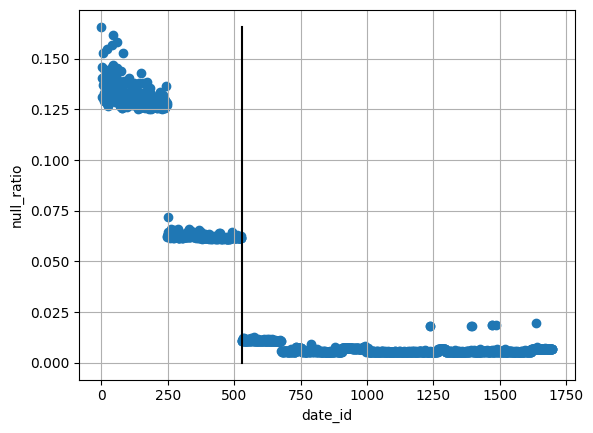

If threshold is 530, 


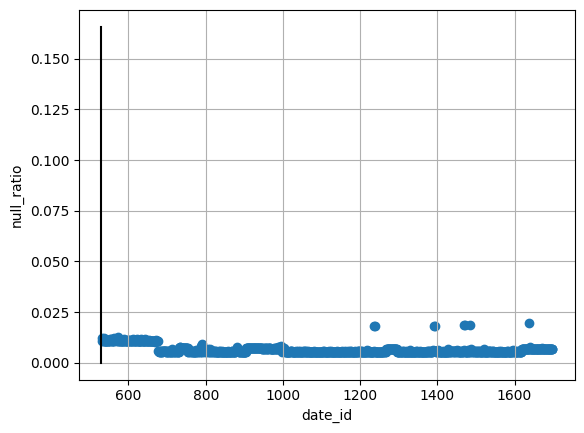

In [6]:
offline_strt_dt = 530
y_max = sum_null_count_per_date_id["null_ratio"].max()

plt.scatter( sum_null_count_per_date_id["date_id"], sum_null_count_per_date_id["null_ratio"] )
plt.plot([offline_strt_dt, offline_strt_dt], [0, y_max], c="black")
plt.xlabel("date_id")
plt.ylabel("null_ratio")
plt.grid()
plt.show()

print(f"If threshold is {offline_strt_dt}, ")

tmp = sum_null_count_per_date_id[ sum_null_count_per_date_id["date_id"] > offline_strt_dt ]
plt.scatter( tmp["date_id"], tmp["null_ratio"] )
plt.plot([offline_strt_dt, offline_strt_dt], [0, y_max], c="black")
plt.xlabel("date_id")
plt.ylabel("null_ratio")
plt.grid()
plt.show()


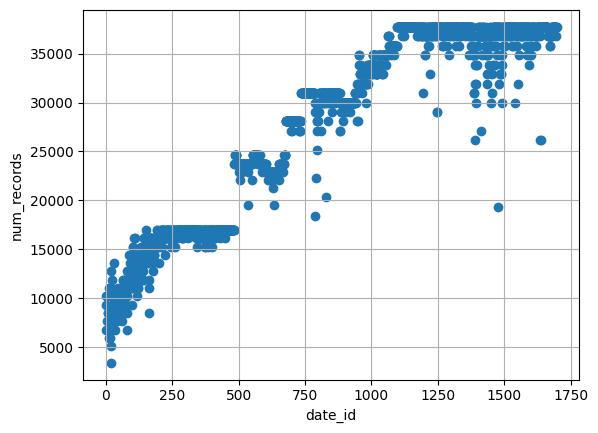

In [7]:
plt.scatter( sum_null_count_per_date_id["date_id"], sum_null_count_per_date_id["num_records"] )
plt.xlabel("date_id")
plt.ylabel("num_records")
plt.grid()
plt.show()

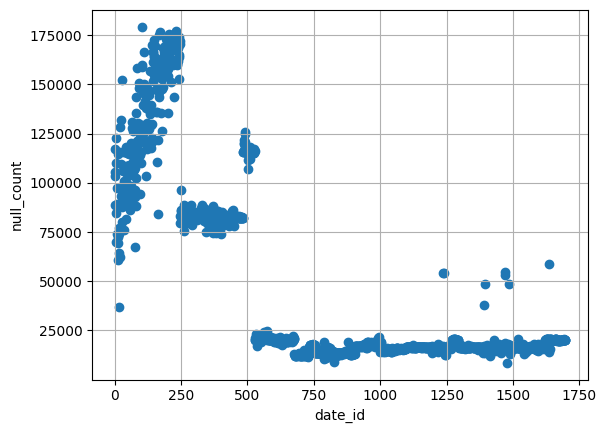

In [8]:
plt.scatter( sum_null_count_per_date_id["date_id"], sum_null_count_per_date_id["null_count"] )
plt.xlabel("date_id")
plt.ylabel("null_count")
plt.grid()
plt.show()